# Using Random Forest for Regression

# Problem Definition

The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

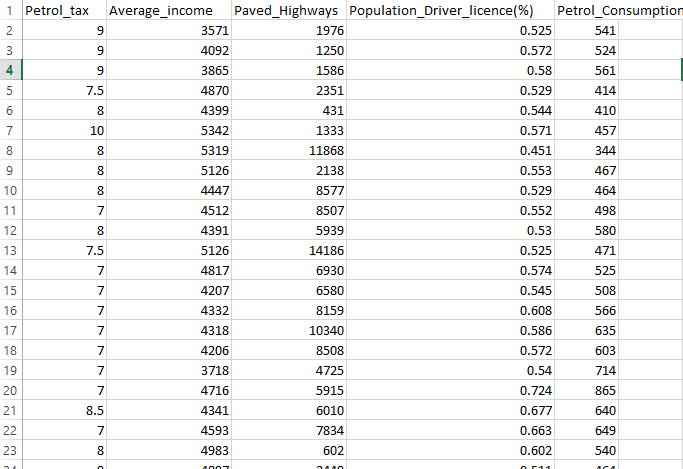

To solve this regression problem we will use the random forest algorithm via the Scikit-Learn Python library. We will follow the traditional machine learning pipeline to solve this problem. 

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np

NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow us to store and manipulate tabular data in rows of observations and columns of variables.

In [2]:
# importing the dataset

dataset = pd.read_csv('E:\Online Courses, Internship and more\Intellify\petrol_consumption.csv')

The dataset has been downloaded into the "Intellify" folder of the "Online Courses, Internship and more" folder within the "E" drive. You'll need to change the file path according to your own setup.

In [3]:
# looking at the dimensions of the dataset

dataset.shape

(48, 5)

Thus, we have 48 rows and 5 columns in the dataset. The 5 columns comprise the 4 input features and 1 target variable.

To get a high-level view of what the dataset looks like, we execute the following command:

In [3]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


dataset.head() returns the first 5 rows of the dataset. We can also specify the number of rows that we want to see by passing a number inside the head() function, for eg. dataset.head(10) will display the first 10 rows of the dataset

In [5]:
# taking a look at the descriptive statistics

dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


We can see that the values in our dataset are not very well scaled. We will scale them down before training the algorithm.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

Preparing Data For Training

Two tasks will be performed in this section. The first task is to divide data into 'attributes' and 'label' sets. The resultant data is then divided into training and test sets.

The following script divides data into attributes and labels:

In [4]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

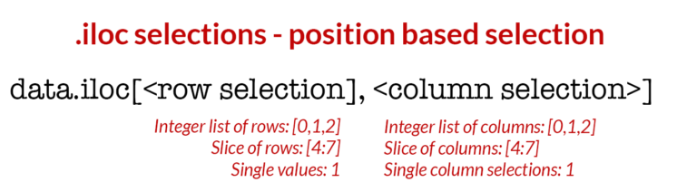

Alternatively, we can split the dataset by:

X = dataset.drop(['Petrol_Consumption'],axis=1)

y = dataset['Petrol_Consumption']

Finally, let's divide the data into training and testing sets:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Feature Scaling

We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Algorithm

Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this regression problem. Execute the following code:

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [7]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs.

Evaluating the Algorithm

The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. Execute the following code to find these values:

In [8]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


With 20 trees, the root mean squared error is 64.93 which is greater than 10 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).

If the number of estimators is changed to 200, the results are as follows:

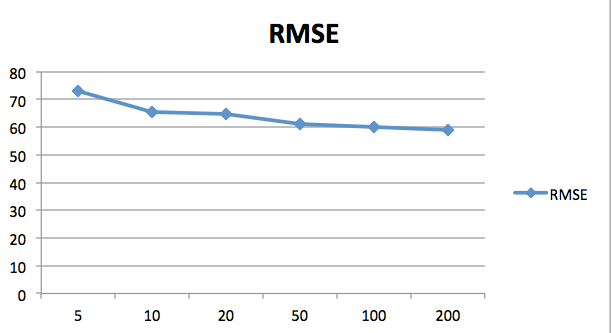

You can see that the error values decreases with the increase in number of estimator. After 200 the rate of decrease in error diminishes, so therefore 200 is a good number for n_estimators. You can play around with the number of trees and other parameters to see if you can get better results on your own.

# Using Random Forest for Classification

# Problem Definition

The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.

This is a binary classification problem and we will use a random forest classifier to solve this problem. Steps followed to solve this problem will be similar to the steps performed for regression.

In [32]:
# importing the necessary libraries

import pandas as pd
import numpy as np

NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow us to store and manipulate tabular data in rows of observations and columns of variables.

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.



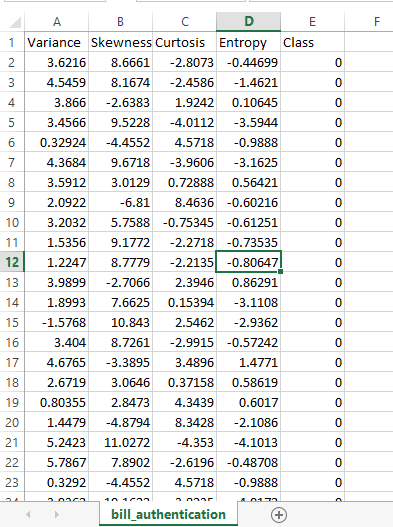

In [33]:
# importing the dataset

dataset = pd.read_csv('E:\Online Courses, Internship and more\Intellify\\bill_authentication.csv')

The dataset has been downloaded into the "Intellify" folder of the "Online Courses, Internship and more" folder within the "E" drive. You'll need to change the file path according to your own setup.

To get a high level view of the dataset, execute the following command:

In [12]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

As was the case with regression dataset, values in this dataset are not very well scaled. The dataset will be scaled before training the algorithm.

Preparing Data For Training

The following code divides data into attributes and labels:

In [34]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

The following code divides data into training and testing sets:

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Scaling

As with before, feature scaling works the same way:

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Training the Algorithm

And again, now that we have scaled our dataset, we can train our random forests to solve this classification problem. To do so, execute the following code:

In [37]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In case of regression we used the RandomForestRegressor class of the sklearn.ensemble library. For classification, we will RandomForestClassifier class of the sklearn.ensemble library. RandomForestClassifier class also takes n_estimators as a parameter. Like before, this parameter defines the number of trees in our random forest. We will start with 20 trees again.

Evaluating the Algorithm

For classification problems the metrics used to evaluate an algorithm are accuracy, confusion matrix, precision recall, and F1 values.

In [48]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred.round()))

[[155   2]
 [  0 118]]


A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

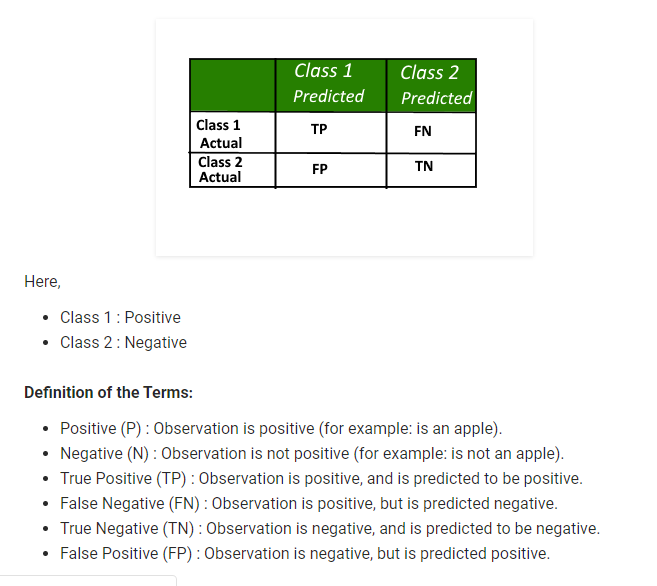

In this example, there are 155 True Positives, 2 False Negatives, 0 False Positives and 118 True Negatives.

Thus, here there are 2 cases of mis-classification.

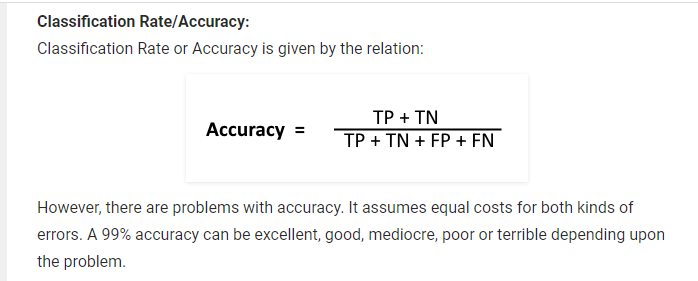

Here, accuracy = 99.27% which is extremely high. 

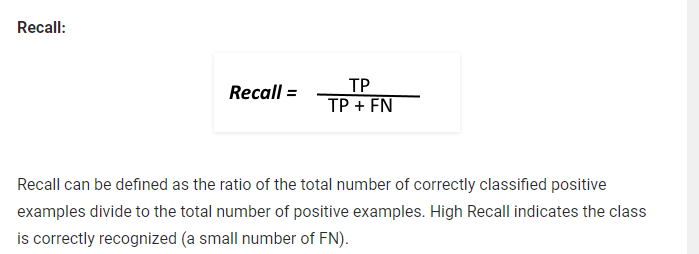

Here, recall = 98.726%

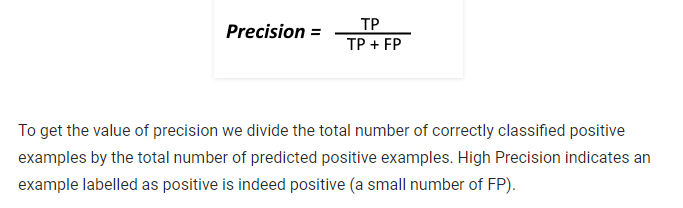

Here, precision = 100%

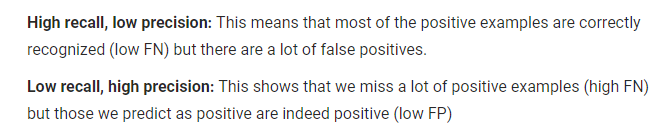

Here, we have high recall as well as high precision, so we can tell that our algorithm has done a good job.

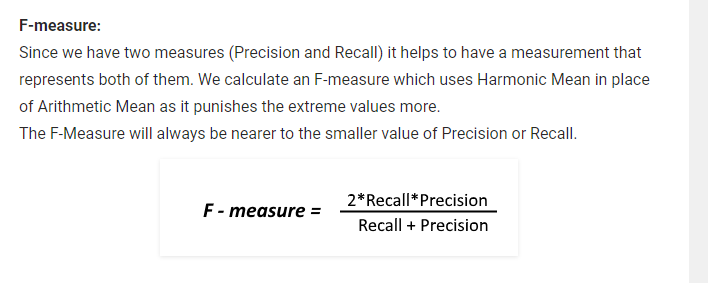

Here, F-measure = 0.993